# Runtime Correlations

In [1]:
import pandas as pd

In [48]:
#import relevant tables

movie_budgets = pd.read_csv("./data/tngross.csv")
movie_production = pd.read_csv("./data/tnproduction.csv")

In [49]:
movie_production

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States


In [50]:
movie_budgets

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


In [51]:
#merge two tables together on index

df = movie_production.merge(movie_budgets, left_index=True, right_index=True)

In [52]:
#Clean up data by removing '$' and ',' from the production budget and worldwide gross and then convert columns to integers

df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(int)

In [53]:
#drop unnecessary columns

df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [54]:
#Exclude rows where there is no value given for runtime

df = df[(df['runtime_minutes'] != 'None')]

In [55]:
#Remove 'minutes' from runtime minutes category and convert to integer

df['runtime_minutes'] = df['runtime_minutes'].str.replace('minutes', '')
df['runtime_minutes'] = df['runtime_minutes'].astype(int)

In [56]:
#Check to make sure data types are accurate

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 6099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runtime_minutes     4995 non-null   int64 
 1   genres              4995 non-null   object
 2   production_company  4995 non-null   object
 3   production_country  4995 non-null   object
 4   release_date        4995 non-null   object
 5   movie               4995 non-null   object
 6   production_budget   4995 non-null   int64 
 7   domestic_gross      4995 non-null   object
 8   worldwide_gross     4995 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 390.2+ KB


In [57]:
#Remove rows from worldwide gross that have a value of 0

df = df[(df['worldwide_gross'] != 0)]

In [58]:
#Create a new column that divides worldwide gross by production budget in order to get a ratio for profit

df['profit'] =  df['worldwide_gross'] / df['production_budget']

In [59]:
#Sort data frame by profit in descending order

df = df.sort_values(by=['profit'], ascending=False)

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
6013,93,Action,Roadshow Films,Australia,"Apr 12, 1979",Mad Max,200000,"$8,750,000",99750000,498.750000
5882,96,Horror,"Blumhouse, Solana Films",United States,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
6080,81,Horror,"New Line Cinema, Blumhouse, Tremendum Pictures...",United States,"Jul 9, 2015",The Gallows,100000,"$22,764,410",41656474,416.564740
5794,81,Horror,None,United States,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5728,70,Adventure,Walt Disney Animation Studios,United States,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312
...,...,...,...,...,...,...,...,...,...,...
4068,95,Action,"SC Films Thailand, Thor Pictures, BMP","Thailand, United States","May 8, 2015",Skin Trade,9000000,"$1,242",1242,0.000138
440,156,Musical,None,United States,"Nov 12, 2021",West Side Story,100000000,$0,11702,0.000117
4700,123,Action,None,"United Kingdom, United States","Dec 10, 1977",Capricorn One,5000000,$0,401,0.000080
5340,83,Black Comedy,"Aristar Entertainment, Sheridanscope",United States,"Mar 20, 2015",The Walking Deceased,2000000,$0,43,0.000022


In [60]:
#Calculate correlation of movie runtime and profitability

correlation = df['runtime_minutes'].corr(df['profit'])
correlation

-0.030769039757055326

In [61]:
#Create two new data frames, one that only includes profitable movies and one that only includes unprofitable movies

profitable = df[df['profit'] >= 1]
non_profitable = df[df['profit'] < 1]

In [27]:
profitable.describe()

,Unnamed: 0_x,runtime_minutes,Unnamed: 0_y,production_budget,worldwide_gross,profit
count,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000
mean,2583.715567,110.286169,2583.715567,4.173212e+07,1.532401e+08,6.506777
std,1708.101643,20.337115,1708.101643,4.927727e+07,2.201779e+08,20.213430
min,0.000000,41.000000,0.000000,1.000000e+05,1.105360e+05,1.000265
25%,1073.500000,96.000000,1073.500000,9.500000e+06,3.132758e+07,1.895467
50%,2395.000000,107.000000,2395.000000,2.500000e+07,7.700959e+07,3.120961
75%,3994.500000,121.000000,3994.500000,5.500000e+07,1.802631e+08,5.453992
max,6088.000000,248.000000,6088.000000,4.000000e+08,2.845900e+09,498.750000


In [28]:
non_profitable.describe()

,Unnamed: 0_x,runtime_minutes,Unnamed: 0_y,production_budget,worldwide_gross,profit
count,1539.000000,1539.000000,1539.000000,1.539000e+03,1.539000e+03,1539.000000
mean,3352.476283,104.993502,3352.476283,2.361745e+07,1.245070e+07,0.365030
std,1690.220273,18.765092,1690.220273,2.799081e+07,2.116215e+07,0.331230
min,72.000000,9.000000,72.000000,1.000000e+05,0.000000e+00,0.000000
25%,1886.500000,92.000000,1886.500000,4.000000e+06,1.084865e+05,0.029417
50%,3330.000000,102.000000,3330.000000,1.500000e+07,3.436763e+06,0.289719
75%,4877.500000,114.000000,4877.500000,3.300000e+07,1.590937e+07,0.661249
max,6099.000000,260.000000,6099.000000,2.000000e+08,1.741313e+08,0.998889


In [62]:
#removing rows where worldwide gross = 0
non_profitable = non_profitable[(non_profitable['worldwide_gross'] != 0)]

In [63]:
#print mean runtimes of profitable and non-profitable movies
avg_runtime_profitable = profitable['runtime_minutes'].mean().round(2)
avg_runtime_non_profitable = non_profitable['runtime_minutes'].mean().round(2)

print(f'The mean runtime of profitable movies is {avg_runtime_profitable} minutes.')
print(f'The mean runtime of non-profitable movies is {avg_runtime_non_profitable} minutes.')

The mean runtime of profitable movies is 110.29 minutes.
The mean runtime of non-profitable movies is 106.75 minutes.


In [64]:
#print median runtimes of profitable and non-profitable
median_runtime_profitable = profitable['runtime_minutes'].median().round(2)
median_runtime_non_profitable = non_profitable['runtime_minutes'].median().round(2)

print(f'The median runtime of profitable movies is {median_runtime_profitable} minutes.')
print(f'The median runtime of non-profitable movies is {median_runtime_non_profitable} minutes.')

The median runtime of profitable movies is 107.0 minutes.
The median runtime of non-profitable movies is 103.0 minutes.


In [69]:
#Calculate correlation of movie runtime and profitability for both the profitable and non-profitable data frames
correlation_profitable = profitable['runtime_minutes'].corr(profitable['profit'])
correlation_non_profitable = non_profitable['runtime_minutes'].corr(non_profitable['profit'])

print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_profitable}.')
print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_non_profitable}.')

The correlation of movie runtime and profitability for profitable movies is: -0.05098019410790402.
The correlation of movie runtime and profitability for profitable movies is: 0.12932930544517174.


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

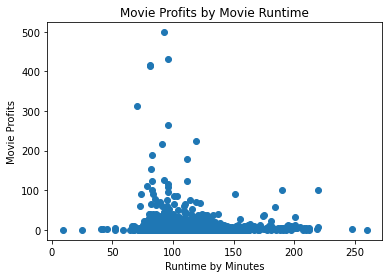

In [25]:
fig, ax = plt.subplots()

ax.scatter(x = df['runtime_minutes'], y = df['profit'])
ax.set_title('Movie Profits by Movie Runtime')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Movie Profits');

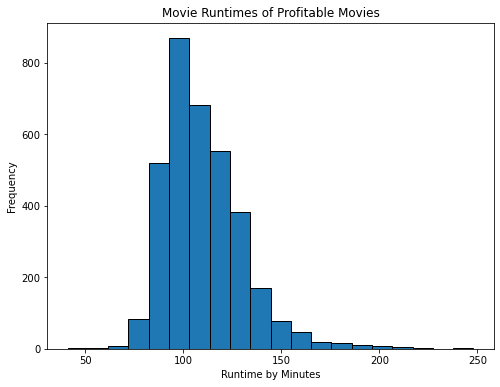

In [26]:
import numpy as np

fig, ax = plt.subplots(figsize = (8,6))

x=profitable['runtime_minutes']


ax.hist(x, edgecolor="black", bins=20)
ax.set_title('Movie Runtimes of Profitable Movies')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Frequency');

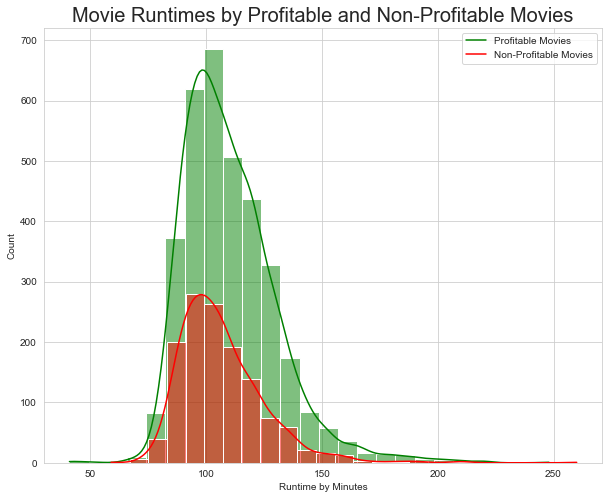

In [72]:
#Create a historgram with kde line of movie runtimes for both profitable movies and unprofitable movies

import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("whitegrid") 
sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha  = 0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

plt.savefig('movie_runtimes_profitable_and_non-Profitable Movies.png');

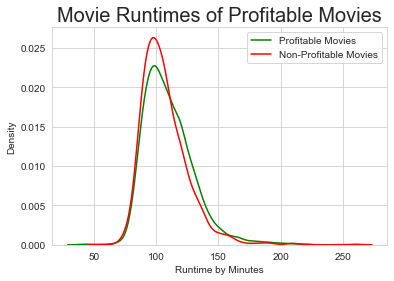

In [28]:
sns.set_style("whitegrid") 
sns.kdeplot(data=profitable, x="runtime_minutes", color="green")
sns.kdeplot(data=non_profitable, x="runtime_minutes", color="red")
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes of Profitable Movies", size=20)

plt.legend(labels=["Profitable Movies","Non-Profitable Movies"]);

In [76]:
#Create a new dataframe grouped by genre and arranged by descending profit amount

genre_df = df.groupby('genres').apply(lambda x: x.sort_values(by ='profit', ascending = False))

In [77]:
#Rename genre category to genre_cateogry to avoid confusion

genre_df.rename({'genres': 'genre_category'}, axis=1, inplace=True)

In [78]:
#Get the number of movies for each genre

genre_df.value_counts('genre_category')

genre_category
Drama                  1236
Comedy                  787
Action                  651
Adventure               634
Thriller/Suspense       507
Horror                  397
Romantic Comedy         205
Musical                  81
Black Comedy             81
Documentary              77
Western                  62
None                     40
Concert/Performance      13
Multiple Genres           2
dtype: int64

In [79]:
#Drop genres with less than 50 movies as well as rows that have worldwide gross of 0

genre_df = genre_df.loc[genre_df['genre_category'] != 'Concert/Performance']
genre_df = genre_df.loc[genre_df['genre_category'] != 'None']
genre_df = genre_df.loc[genre_df['genre_category'] != 'Multiple Genres']
genre_df = genre_df.loc[genre_df['worldwide_gross'] != 0]


In [82]:
#Find the median profits of each genre

genre_df.groupby(['genre_category'])['profit'].median().sort_values()

genre_category
Documentary          1.330743
Western              1.439160
Drama                1.730852
Thriller/Suspense    1.753237
Black Comedy         1.769962
Comedy               2.101734
Action               2.218164
Adventure            2.623640
Musical              2.624576
Romantic Comedy      2.642526
Horror               3.316691
Name: profit, dtype: float64

In [83]:
#Find the mean profits of each genre

genre_df.groupby(['genre_category'])['profit'].mean().sort_values()

genre_category
Black Comedy          2.986744
Thriller/Suspense     3.152935
Comedy                3.724391
Action                3.926018
Romantic Comedy       4.140978
Drama                 4.223643
Adventure             4.298659
Western               4.874936
Documentary           6.583380
Musical               8.248880
Horror               12.697377
Name: profit, dtype: float64

In [461]:
horror = genre_df[(genre_df['genre_category'] == 'Horror')]
horror.head(50)

Unnamed: 0  runtime_minutes genre_category  \
genres                                                    
Horror 5882        5882               96         Horror   
       6080        6080               81         Horror   
       5794        5794               81         Horror   
       6077        6077               96         Horror   
       5930        5930               91         Horror   
       6066        6066               83         Horror   
       5812        5812               96         Horror   
       5584        5584               83         Horror   
       5964        5964               96         Horror   
       5528        5528              103         Horror   
       5918        5918               85         Horror   
       6082        6082               89         Horror   
       5429        5429              101         Horror   
       5586        5586               82         Horror   
       5001        5001               91         Horror   
       4551        4551              104         Horror   
       5589        5589               93         Horror   
       4552        4552               81         Horror   
       4356        4356               98         Horror   
       3543        3543              124         Horror   
       5379        5379              100         Horror   
       5442        5442              126         Horror   
       5782        5782               88         Horror   
       3544        3544              121         Horror   
       5819        5819               95         Horror   
       4554        4554              105         Horror   
       4013        4013              116         Horror   
       5003        5003               85         Horror   
       4555        4555               80         Horror   
       5005        5005              110         Horror   
       5921        5921               88         Horror   
       4558        4558               87         Horror   
       5588        5588               94         Horror   
       5565        5565               99         Horror   
       3751        3751              105         Horror   
       4557        4557               96         Horror   
       4559        4559               89         Horror   
       3185        3185              109         Horror   
       5431        5431               94         Horror   
       1723        1723              135         Horror   
       4257        4257              124         Horror   
       4827        4827              105         Horror   
       4556        4556               94         Horror   
       3033        3033               95         Horror   
       5564        5564               89         Horror   
       3753        3753               92         Horror   
       4570        4570               84         Horror   
       5590        5590               91         Horror   
       5519        5519               87         Horror   
       5128        5128              111         Horror   

                                            production_company  \
genres                                                           
Horror 5882                            Blumhouse, Solana Films   
       6080  New Line Cinema, Blumhouse, Tremendum Pictures...   
       5794                                               None   
       6077                                               None   
       5930                                               None   
       6066                                               None   
       5812     Paramount Pictures, Georgetown Productions Inc   
       5584                        Insurge Pictures, Prototype   
       5964                                               None   
       5528                                               None   
       5918                                               None   
       6082                                               None   
       5429         

In [85]:
#Create a new data frame of just the top 5 genres based on median profits and return number of movies in each genre

top_5_genres_by_medianprofit = genre_df
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Black Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Documentary']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Drama']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Thriller/Suspense']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Western']
top_5_genres_by_medianprofit.value_counts('genre_category')

genre_category
Action             651
Adventure          634
Horror             397
Romantic Comedy    205
Musical             81
dtype: int64

In [86]:
top_5_genres_by_medianprofit.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,1968.000000,1.968000e+03,1.968000e+03,1968.000000
mean,107.389736,5.668187e+07,1.864949e+08,6.015806
std,19.609560,5.815109e+07,2.644504e+08,24.231240
min,52.000000,1.000000e+05,1.700000e+01,0.000002
25%,93.000000,1.400000e+07,2.868970e+07,1.273411
50%,103.000000,3.500000e+07,8.743651e+07,2.618592
75%,118.000000,8.000000e+07,2.374813e+08,4.686098
max,212.000000,4.000000e+08,2.845900e+09,498.750000


In [89]:
#Calculate the mean runtime minutes of movies by genre

top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].mean()


genre_category
Action             114.915515
Adventure          104.384858
Horror              98.949622
Musical            116.222222
Romantic Comedy    105.639024
Name: runtime_minutes, dtype: float64

In [90]:
#Calculate the median runtime minutes of movies by genre

for_graph = top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].median()
for_graph

genre_category
Action             112
Adventure           99
Horror              96
Musical            113
Romantic Comedy    104
Name: runtime_minutes, dtype: int64

In [39]:
#Create x-axis variable for graph using genre categories

x = for_graph.index
x

Index(['Action', 'Adventure', 'Horror', 'Musical', 'Romantic Comedy'], dtype='object', name='genre_category')

In [40]:
#Create y-axis variable for graph using  median runtime minutes of movies by genre

y = for_graph.tolist()[0:5]
y

[112, 99, 96, 113, 104]

In [545]:
#Median runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].median()

103.0

In [500]:
#Mean runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].mean()

107.38973577235772

In [505]:
#Correlation of all runtime and profit in top 5 profitable genres

correlation_top_genres = top_5_genres_by_medianprofit['runtime_minutes'].corr(top_5_genres_by_medianprofit['profit'])
correlation_top_genres

-0.06541856717104048

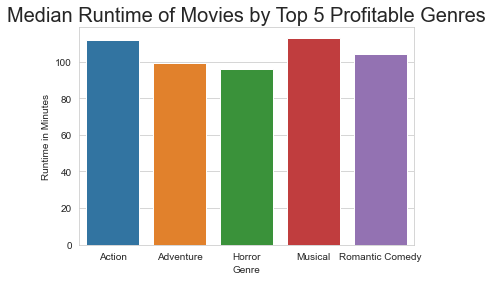

In [91]:
#Create bar graph showing median runtime of movies by genre

sns.barplot(x=for_graph.index, y=for_graph.values)
plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres", size=20)

plt.savefig('runtimes_by_genre.png');